In [1]:
# Import libraries for data handling and modeling

import pandas as pd # for handling data
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for nicer plots

# Import model tools

import statsmodels.api as sm # for statistical model summaries
from sklearn.linear_model import LinearRegression # for fitting linear regression
from sklearn.metrics import mean_squared_error # for calculating RMSE

In [2]:
# Load the data
boxing = pd.read_csv("https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Modules/Multiple%20Regression%20Boxing%20by%20Izaan%20Khudadad/Boxing_Pay_data_cleaned.csv", na_values=['?'])
boxing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Boxer     4670 non-null   object 
 1   Date      4670 non-null   object 
 2   Purse     4670 non-null   float64
 3   lnRPurse  4670 non-null   float64
 4   weight    4670 non-null   float64
 5   Age       4670 non-null   float64
 6   Wins      4670 non-null   int64  
 7   Losses    4670 non-null   int64  
 8   KO        4670 non-null   int64  
 9   W-Title   4670 non-null   int64  
 10  PPV       4670 non-null   int64  
 11  RDS       4670 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 437.9+ KB


1. Now build a model predicting lnRPurse using weight, RDS, Wins, and PPV. Print a model summary as well.

In [73]:
# Assigning the data set to df(data frame)
df = boxing

# Drop rows with missing values in relevant columns
df = df[['lnRPurse', 'weight', 'RDS', 'PPV', 'Wins',]].dropna()

# Define X and y 
X = df[['weight','Wins', 'RDS', 'PPV']]
y = df['lnRPurse']

# Fit model
model = LinearRegression()
model.fit(X, y)

# add constant term for intercept
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               lnRPurse   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3723.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:02:13   Log-Likelihood:                -5615.5
No. Observations:                4670   AIC:                         1.124e+04
Df Residuals:                    4665   BIC:                         1.127e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2718      0.071     74.501      0.0

2. Interpret the coefficients and how they affect the prediction. 

These values are based on a log scale, not raw dollars. 

- const : This is the baseline predicted log pay when all other variables are zero.
- weight : For each additional pound of weight, a boxer is expected to earn about 0.0027/0.27%.  
- PPV : Fighting on Pay-Per-View increases expected earnings by 1.8991. 
- Wins : Each additional win increases expected earnings by about 0.0348.
- RDS : Each extra scheduled round increases expected earnings by about 0.3531.

By using the exponential function, we find clearer insights.

- RDS : 0.3531, exp(0.3531) = 1.42, For each additional round, predicted earnings increase by a factor of 1.42
→ or about a 42% increase in actual purse earnings.

- PPV : 1.8991, exp(1.8991) = 6.68, If the fight is on Pay-Per-View, expected earnings increase by a factor of 6.68.  



3. Calculate the RMSE, then explain what it means in the context of the data.

In [74]:
# Predict on same data
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.805


An RMSE of 0.805 means that, on average, your model's predictions are off by about 0.805 log units. In actual dollars, that means predictions are off by more than 2× on average. 

4. Create a residual plot for your model, explain what it shows in the context of the data.

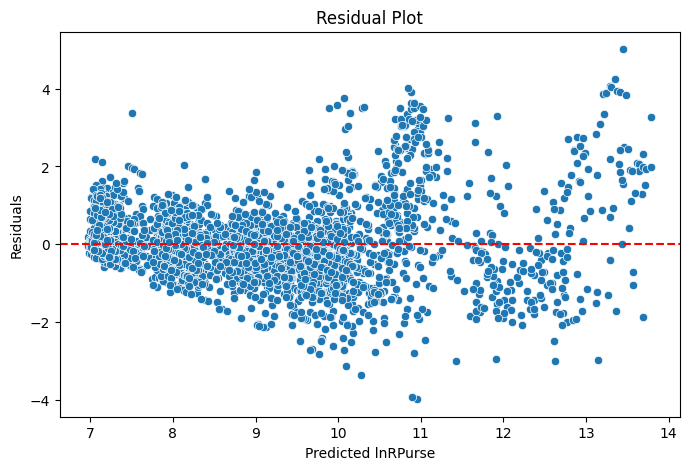

In [75]:
# Plot residuals to check how well the model fits the data
residuals = y - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted lnRPurse")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The model generally predicts well for lower and middle earners, but it struggles more with high earners.
This plot suggests that prediction errors grow larger as expected earnings increase, which could mean:

- We might be missing a nonlinear relationship.
- Or we need a transformation or additional variables to capture high-end variance better.

5. Which of these residual plots best shows a well-fit linear model?

**A.**

<img src="https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Modules/Multiple%20Regression%20Boxing%20by%20Izaan%20Khudadad/residual_plot_A.png" width="400"/>
